In [1]:
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def mean_absolute_percentage_error(y_test,y_pred):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    errors = abs(y_test - y_pred)
    mape = 100 * np.mean(errors / y_test)
    #print('mape---{}'.format(mape))
    mape1= np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    return mape


In [3]:
def calculate_metrics(y, ypred):
    MAE = metrics.mean_absolute_error(y, ypred)
    RMSE = metrics.mean_squared_error(y, ypred,squared=False)
    mse=metrics.mean_squared_error(y,ypred)
    r2=metrics.r2_score(y,ypred)

    return MAE,RMSE,mse,r2

In [4]:

price_usd_df=pd.read_excel("/content/drive/MyDrive/Dissertation/My Dissertation/Data/Pre-processed results/Removed missing values.xlsx")

print(price_usd_df.dtypes)
price_usd_df.head(21)
df=price_usd_df

Date      datetime64[ns]
XBTUSD           float64
AUDUSD           float64
CADUSD           float64
CNYUSD           float64
EURUSD           float64
GBPUSD           float64
JPYUSD           float64
NZDUSD           float64
SGDUSD           float64
dtype: object


In [5]:
df=df.drop(['Date'],axis=1)
df.columns

Index(['XBTUSD', 'AUDUSD', 'CADUSD', 'CNYUSD', 'EURUSD', 'GBPUSD', 'JPYUSD',
       'NZDUSD', 'SGDUSD'],
      dtype='object')

In [6]:
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = pd.concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

In [84]:
lag = 7 #adding 3 days lags creating number of observations 
n_features = 9 #Features in the dataset.
n_obs = lag*n_features
n_obs

63

In [85]:
values=df.values
values.shape

(1836, 9)

In [86]:
series_data = series_to_supervised(values,lag)
series_data_Df=pd.DataFrame(series_data)
series_data_Df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,1024.38,0.7219,0.7448,0.14385,1.0405,1.2237,0.008493,0.6918,0.6895,1091.66,...,0.6963,789.11,0.7441,0.7589,0.14471,1.0582,1.2213,0.008665,0.7055,0.7008
1,1091.66,0.7283,0.7519,0.14504,1.0489,1.2323,0.008529,0.6970,0.6948,971.26,...,0.7008,827.63,0.7484,0.7608,0.14515,1.0613,1.2162,0.008717,0.7095,0.7006
2,971.26,0.7338,0.7562,0.14547,1.0607,1.2419,0.008669,0.7026,0.7001,898.16,...,0.7006,830.70,0.7502,0.7625,0.14506,1.0643,1.2182,0.008733,0.7131,0.6998
3,898.16,0.7301,0.7555,0.14424,1.0532,1.2287,0.008547,0.6960,0.6950,917.41,...,0.6998,822.20,0.7502,0.7625,0.14506,1.0643,1.2182,0.008733,0.7131,0.6998
4,917.41,0.7301,0.7555,0.14424,1.0532,1.2287,0.008547,0.6960,0.6950,897.51,...,0.6998,833.10,0.7477,0.7589,0.14506,1.0601,1.2047,0.008757,0.7103,0.6991


In [87]:
series_data.shape

(1829, 72)

In [88]:
x=series_data[:,:-9]
x.shape

(1829, 63)

In [89]:
y=series_data[:,-9].reshape(-1,1)
y.shape

(1829, 1)

In [90]:
split_point=int(0.8*len(series_data))
split_point

1463

In [91]:
train_X,test_X,train_Y,test_Y=x[:int(0.8*(len(x)))],x[int(0.8*(len(x))):],y[:int(0.8*(len(y)))],y[int(0.8*(len(y))):]
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(1463, 63)
(1463, 1)
(366, 63)
(366, 1)


In [97]:
svr_rbf_base=SVR(C=1000,kernel='rbf')
svr_rbf_base.fit(train_X,train_Y)

#svr_ploy_base=SVR(kernel='poly')
#svr_ploy_base.fit(train_X,train_Y)

#svr_lin_base=SVR(kernel='linear')
#svr_lin_base.fit(train_X,train_Y)



SVR(C=1000)

In [98]:
rbf_base_pred=svr_rbf_base.predict(test_X)
rbf_base_pred=rbf_base_pred.reshape(-1,1)

#poly_base_pred=svr_ploy_base.predict(test_X)
#poly_base_pred=poly_base_pred.reshape(-1,1)

#lin_base_pred=svr_lin_base.predict(test_X)
#lin_base_pred=lin_base_pred.reshape(-1,1)

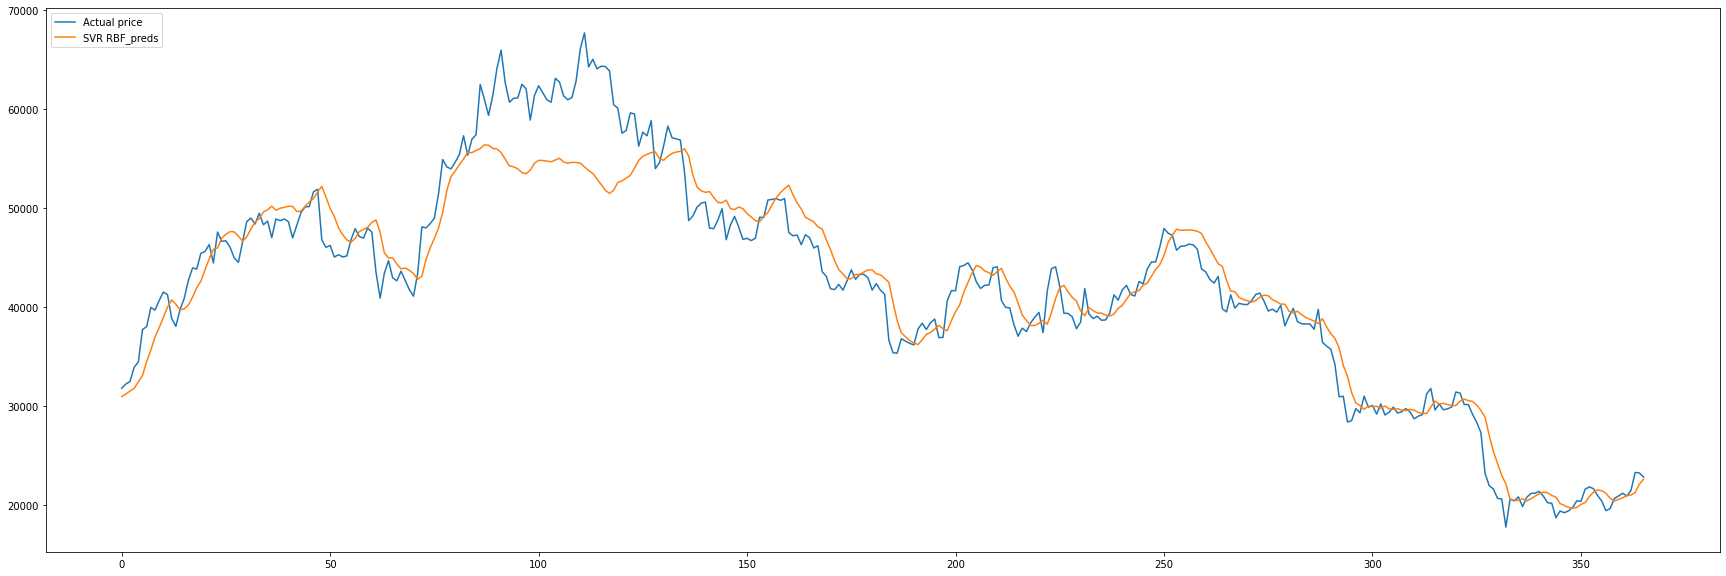

In [99]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
plt.plot(test_Y,label='Actual price')
plt.plot(rbf_base_pred,label='SVR RBF_preds')
#plt.plot(poly_base_pred,label='poly_preds',color='green')
#plt.plot(lin_base_pred,label='lin_preds',color='orange')
plt.legend(loc="upper left")
plt.show()

In [100]:
mape = mean_absolute_percentage_error(test_Y,rbf_base_pred)
mae,rmse,mse,r2=calculate_metrics(test_Y,rbf_base_pred)
print('Results of SVR_rbf wihtout tuning')
print('MAPE  :{:0.4f}'.format(mape))
print('MAE  :{:0.4f}'.format(mae))
print('RMSE :{:0.4f} '.format(rmse))
print('MSE :{:0.4f} '.format(mse))
print('r2   :{:0.4f}'.format(r2))

Results of SVR_rbf wihtout tuning
MAPE  :5.1055
MAE  :2287.7362
RMSE :3334.3208 
MSE :11117695.4740 
r2   :0.9141


In [101]:
print('mean of test Y   :{:0.4f}'.format(test_Y.mean()))
print('max of test Y   :{:0.4f}'.format(test_Y.max()))
print('min of test Y   :{:0.4f}'.format(test_Y.min()))

scaled_rmse_tuned=rmse/(test_Y.max()-test_Y.min())
print('scaled_rmse   :{:0.4f}'.format(scaled_rmse_tuned))

mean of test Y   :42215.6181
max of test Y   :67734.0400
min of test Y   :17785.0900
scaled_rmse   :0.0668


# ***Hyperparameter Tuning***

In [102]:
C_arr = [1,10,100,1000,1500,2000,2500,3000,3500,4000]
eps_arr = [1,0.1,0.01,0.001,0.0001,0.00001,1e-06,1e-07,1e-08]
#gamma = [0,0.1,0.2,0.3,0.4,0.5]
cache_size = [100,200,300,400,500,600,700,800]
degree = [1,2,3,4,5]

In [103]:
random_grid = {'epsilon': eps_arr,
              # 'gamma': gamma,
               'C': C_arr,
               'cache_size': cache_size,
               'degree': degree
}

In [104]:
from pprint import pprint
pprint(random_grid)

{'C': [1, 10, 100, 1000, 1500, 2000, 2500, 3000, 3500, 4000],
 'cache_size': [100, 200, 300, 400, 500, 600, 700, 800],
 'degree': [1, 2, 3, 4, 5],
 'epsilon': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08]}


In [105]:
svr_grid=SVR()
pprint(svr_grid)

SVR()


In [116]:
from sklearn.model_selection import GridSearchCV
svr_rbf = RandomizedSearchCV(estimator = svr_grid, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#svr_rbf = GridSearchCV(svr_grid,random_grid, refit = True, verbose = 3,n_jobs = -1)
 

In [117]:
svr_rbf.fit(train_X, train_Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100, 1000, 1500, 2000,
                                              2500, 3000, 3500, 4000],
                                        'cache_size': [100, 200, 300, 400, 500,
                                                       600, 700, 800],
                                        'degree': [1, 2, 3, 4, 5],
                                        'epsilon': [1, 0.1, 0.01, 0.001, 0.0001,
                                                    1e-05, 1e-06, 1e-07,
                                                    1e-08]},
                   random_state=42, verbose=2)

In [118]:
svr_rbf.best_params_, svr_rbf.best_estimator_

({'epsilon': 0.01, 'degree': 3, 'cache_size': 800, 'C': 4000},
 SVR(C=4000, cache_size=800, epsilon=0.01))

In [119]:
#svr_rbf_tuned=SVR(kernel='rbf',C=3000, degree=4, epsilon=1e-05)
#svr_rbf_tuned=SVR(kernel='rbf',C=3500, cache_size=600, epsilon=1e-07)
svr_rbf_tuned=SVR(kernel='rbf',C=4000, cache_size=800, epsilon=0.01)
svr_rbf_tuned.fit(train_X,train_Y)


SVR(C=4000, cache_size=800, epsilon=0.01)

In [120]:
rbf_pred_tuned=svr_rbf_tuned.predict(test_X)
rbf_pred_tuned=rbf_pred_tuned.reshape(-1,1)

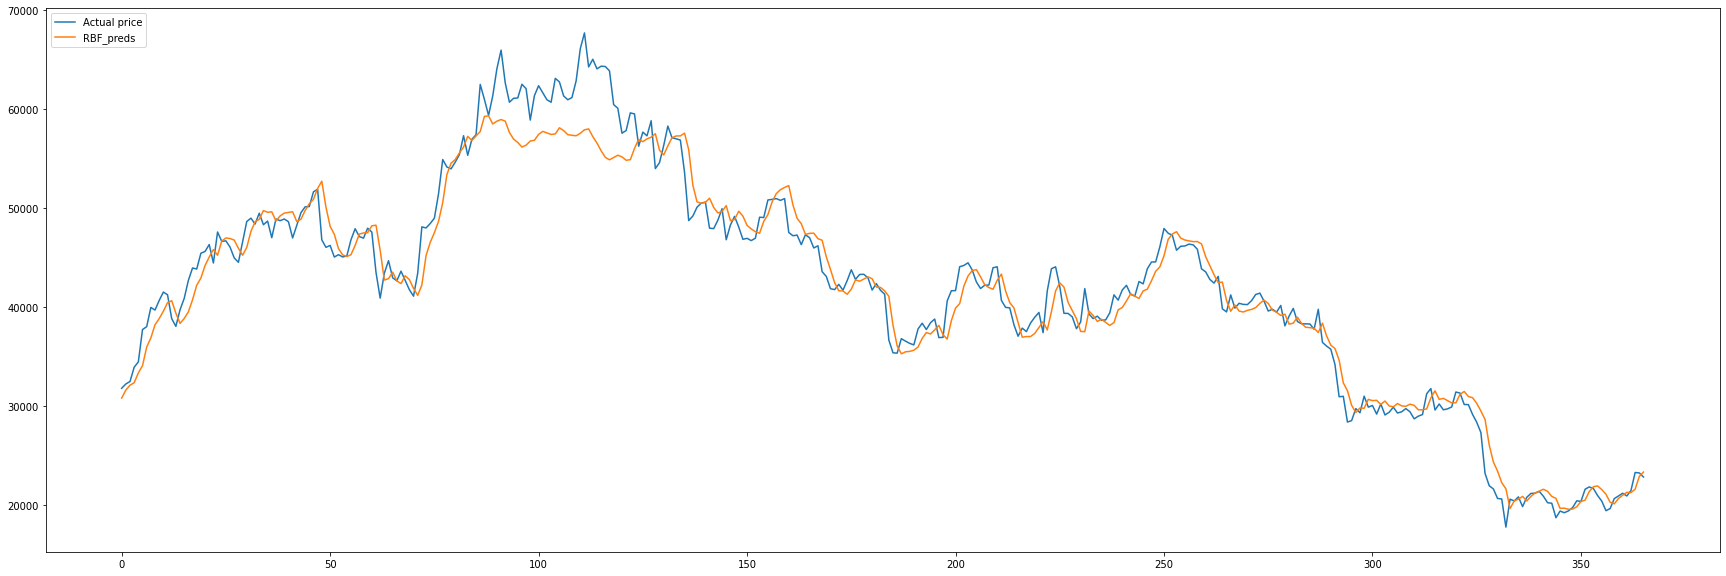

In [121]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
plt.plot(test_Y,label='Actual price')
plt.plot(rbf_pred_tuned,label='RBF_preds')
plt.legend(loc="upper left")
plt.show()

In [122]:
test_Y=test_Y.reshape(-1,1)
mape = mean_absolute_percentage_error(test_Y,rbf_pred_tuned)
mae,rmse,mse,r2=calculate_metrics(test_Y,rbf_pred_tuned)
print('Results of SVR_rbf after tuning')
print('MAPE  :{:0.4f}'.format(mape))
print('MAE  :{:0.4f}'.format(mae))
print('RMSE :{:0.4f} '.format(rmse))
print('MSE :{:0.4f} '.format(mse))
print('r2   :{:0.4f}'.format(r2))

Results of SVR_rbf after tuning
MAPE  :3.8663
MAE  :1676.6268
RMSE :2407.6039 
MSE :5796556.5703 
r2   :0.9552


In [123]:
print('mean of test Y   :{:0.4f}'.format(test_Y.mean()))
print('max of test Y   :{:0.4f}'.format(test_Y.max()))
print('min of test Y   :{:0.4f}'.format(test_Y.min()))

scaled_rmse_tuned=rmse/(test_Y.max()-test_Y.min())
print('scaled_rmse   :{:0.4f}'.format(scaled_rmse_tuned))


mean of test Y   :42215.6181
max of test Y   :67734.0400
min of test Y   :17785.0900
scaled_rmse   :0.0482
